In [34]:
# Libraries and utilities
# Libraries and utilities

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    
)

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve

from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


In [35]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

# One-hot encoding
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train[i]=le.fit_transform(df_train[i])
categorical_col = ["emotion"]

df_train = pd.get_dummies(df_train, columns=categorical_col)    

"""
# Label encoding for train and test
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])
for i in c:
    df_test[i]=le.fit_transform(df_test[i])
"""

"""

# Normalization of train and test
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion_angry" and n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features
scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

"""

'\n\n# Normalization of train and test\nscaler = StandardScaler()\nnumeric_features = [n for n in df_train.columns if n!="emotion_angry" and n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]\nscaled_features = scaler.fit_transform(df_train[numeric_features])\ndf_train[numeric_features] = scaled_features\nscaled_features_test = scaler.transform(df_test[numeric_features])\ndf_test[numeric_features] = scaled_features_test\n\n'

- Statistical  (HBOS)
- Density-based approach (LOF)
- Distance-Based approach (KNN)
- Angle-Based approach (ABOD)
- Model-based approach (Isolation Forest) 

In [36]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from pyod.models.hbos import HBOS

In [37]:

mds = MDS(n_components=30) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(df_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [38]:
clf = HBOS()
clf.fit(X_train_mds)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [39]:
y_pred = clf.predict(X_train_mds)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([1645,  183]))

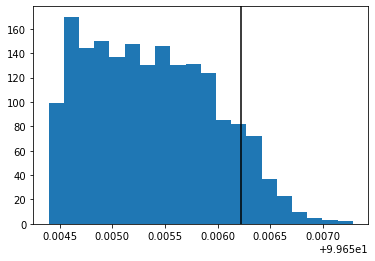

In [40]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(y_pred==1)]), c='k')
plt.show()

In [41]:
pca = PCA(n_components=2)
pca.fit(X_train_mds)
X_pca = pca.transform(X_train_mds)

In [88]:
def plot_scatter(X_pca,s,y):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.prism, edgecolors='k', alpha=0.7)
    plt.title(s)
    plt.show()

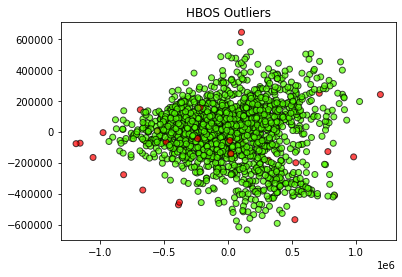

In [89]:
plot_scatter(X_pca,"HBOS Outliers",y_pred)

In [90]:
# list with indexes and scores only for outliers --> np.where(y_pred==1)
outlier_indexes = np.where(y_pred==1)[0]
outlier_scores = clf.decision_scores_[outlier_indexes]

outlier_factor_list = []
for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
print(len(outlier_factor_list))


1801


In [91]:
#We sort in ascending order with respect to LOF factor
def outlier_score(elem):
    return elem[1]

In [92]:
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)
outlier_factor_list[:10]

[(1164, 99.65439272837986),
 (936, 99.65439778580051),
 (703, 99.65440354896128),
 (438, 99.65441119099575),
 (498, 99.65441164939875),
 (520, 99.65441925813022),
 (1091, 99.65442073916421),
 (888, 99.6544239791206),
 (1051, 99.65442590351131),
 (990, 99.65442696229022)]

In [93]:
top1perc = int(float(len(df_train))*0.01)
top1perc

top_outliers_HBOS = outlier_factor_list[:top1perc]
print(len(top_outliers_HBOS))

indexes_list = [i[0] for i in top_outliers_HBOS] #retrieve indexes of outliers
df_HBOS_outliers = df_train.iloc[indexes_list]
df_HBOS_outliers

18


,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
1164,1,0,1,0,0,1.766692e-06,-0.000061,0.0,0.000153,12.626738,...,-0.478982,-0.372714,0,0,0,0,0,0,1,0
936,1,0,1,0,0,-1.853309e-07,-0.000122,0.0,0.000122,8.330380,...,-0.856704,-0.455205,0,0,0,0,0,1,0,0
703,0,1,0,1,1,2.233292e-06,-0.001434,0.0,0.001526,6.534934,...,-1.046702,-0.154644,0,0,0,0,1,0,0,0
438,1,0,0,0,1,-6.354747e-06,-0.000061,0.0,0.000061,12.256504,...,0.227886,-0.702865,0,0,0,0,0,0,1,0
498,0,0,0,0,1,-3.530073e-06,-0.000793,0.0,0.002235,4.936599,...,-1.355829,-0.277213,0,0,0,0,0,0,1,0
520,1,0,1,0,0,-5.123737e-07,-0.000031,0.0,0.000031,15.971540,...,-0.892278,-0.007684,0,0,0,0,0,1,0,0
1091,1,1,0,1,1,-3.005670e-06,-0.000305,0.0,0.001129,12.558808,...,-0.254387,-0.631943,0,0,1,0,0,0,0,0
888,1,1,1,0,1,1.219487e-06,-0.000031,0.0,0.000031,56.464976,...,-0.532559,-0.266733,0,0,0,0,0,0,0,1
1051,1,1,0,1,1,-5.701086e-06,-0.000183,0.0,0.000214,6.023905,...,0.093101,-0.926833,0,1,0,0,0,0,0,0
990,1,0,0,0,0,-9.817569e-08,-0.000122,0.0,0.000122,7.038799,...,-0.782827,-0.350983,0,0,0,0,0,0,0,1


In [94]:
#retrieve track id of outliers
outliers_track_id = list(df_HBOS_outliers.index)
outliers_track_id[:10]
print(len(outliers_track_id))

top_outliers_lof_track_id = []

for i, val in top_outliers_HBOS:
    top_outliers_lof_track_id.append((df_train.iloc[i].name, val))
print(len(top_outliers_lof_track_id))

print("Track id with LOF score of outlierness")
top_outliers_lof_track_id


18
18
Track id with LOF score of outlierness


[(1164, 99.65439272837986),
 (936, 99.65439778580051),
 (703, 99.65440354896128),
 (438, 99.65441119099575),
 (498, 99.65441164939875),
 (520, 99.65441925813022),
 (1091, 99.65442073916421),
 (888, 99.6544239791206),
 (1051, 99.65442590351131),
 (990, 99.65442696229022),
 (1708, 99.65443635218413),
 (1093, 99.65443688138768),
 (523, 99.65443846871383),
 (1173, 99.65443999205803),
 (1055, 99.6544442994547),
 (1087, 99.65444586470196),
 (962, 99.65444784667682),
 (728, 99.65444793720812)]

Provo con il LOF

In [95]:
clf_LOF = LocalOutlierFactor(n_neighbors = 17)
y_pred = clf_LOF.fit_predict(X_train_mds)
y_outliers = X_train_mds[y_pred==-1]
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  27, 1801]))

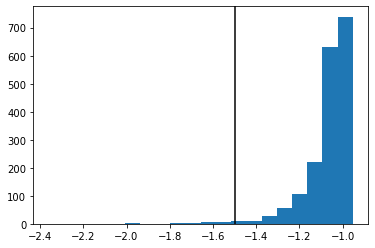

In [96]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=20)
plt.axvline(np.min(clf_LOF.negative_outlier_factor_[np.where(y_pred==1)]), c='k')
plt.show()

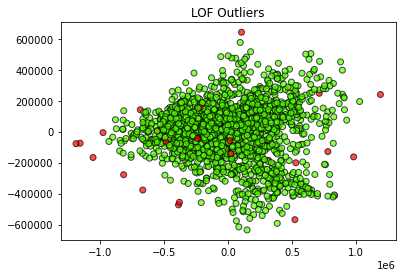

In [97]:

pca = PCA(n_components=2)
pca.fit(X_train_mds)
X_pca = pca.transform(X_train_mds)
plot_scatter(X_pca,"LOF Outliers",y_pred)

In [98]:
# list with indexes and scores only for outliers --> np.where(y_pred==-1)
outlier_indexes = np.where(y_pred==-1)[0]
outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]

outlier_factor_list = []
for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
print(len(outlier_factor_list))

#We sort in ascending order with respect to LOF factor
def outlier_score(elem):
    return elem[1]
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)
outlier_factor_list[:10]

27


[(1818, -2.3608957911799937),
 (1819, -2.2814310315724646),
 (352, -2.1864845533724746),
 (1816, -2.038323411663464),
 (1702, -1.9904420139216128),
 (40, -1.9699626347594403),
 (425, -1.8150020379979381),
 (1815, -1.7767482766040295),
 (1367, -1.7758711778314582),
 (1423, -1.7731708072042698)]

In [99]:
top1perc = int(float(len(df_train))*0.01)
top1perc

top_outliers_LOF = outlier_factor_list[:top1perc]
print(len(top_outliers_LOF))

indexes_list = [i[0] for i in top_outliers_LOF] #retrieve indexes of outliers
df_LOF_outliers = df_train.iloc[indexes_list]
df_LOF_outliers

18


,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
1818,1,1,0,0,0,-1.590157e-08,-0.000366,0.000000,0.000397,17.369828,...,-0.950053,-0.356922,0,0,1,0,0,0,0,0
1819,1,1,0,1,0,-1.834512e-07,-0.000366,0.000000,0.000488,21.708608,...,-0.757745,-0.512022,0,0,1,0,0,0,0,0
352,1,1,1,0,0,-9.154192e-07,-0.001556,0.000000,0.001709,13.123943,...,-0.977898,0.520642,0,0,0,1,0,0,0,0
1816,1,1,1,0,0,-1.897455e-07,-0.000122,0.000000,0.000153,23.689075,...,-1.152757,0.346435,0,0,1,0,0,0,0,0
1702,1,0,0,0,1,5.474721e-05,-0.003815,-0.000092,0.003723,20.580156,...,2.036498,-1.440128,0,0,0,1,0,0,0,0
40,1,1,1,0,1,-9.970549e-07,-0.001160,0.000000,0.001007,19.281083,...,-1.072617,0.272193,0,0,0,1,0,0,0,0
425,1,1,1,1,1,1.323930e-07,-0.000061,0.000000,0.000061,51.805771,...,0.700807,-1.189344,0,1,0,0,0,0,0,0
1815,1,0,0,1,0,-2.319982e-07,-0.000183,0.000000,0.000305,9.141644,...,-1.104861,0.149706,0,0,1,0,0,0,0,0
1367,1,0,0,1,0,2.695109e-07,-0.000031,0.000000,0.000000,7.824765,...,0.846823,-1.062278,0,0,0,0,1,0,0,0
1423,0,1,0,1,0,-2.358484e-07,-0.000366,0.000000,0.000427,5.113687,...,-0.418581,-0.801104,0,1,0,0,0,0,0,0


KNN

In [100]:
clf_KNN = KNN(n_neighbors=5)
clf_KNN.fit(X_train_mds)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [101]:
outliers_KNN = clf_KNN.predict(X_train_mds)
np.unique(outliers_KNN, return_counts=True)

(array([0, 1]), array([1668,  160]))

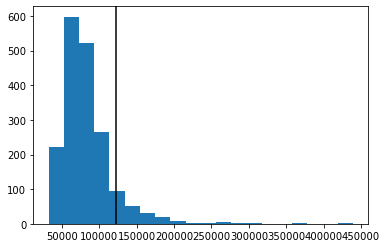

In [102]:
plt.hist(clf_KNN.decision_scores_, bins=20)
plt.axvline(np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)]), c='k')
plt.show()

In [103]:
outlier_All_indexes_knn=list(np.where(outliers_KNN==1)[0])
outlier_indexes_knn = np.where(outliers_KNN==1)[0]
outlier_scores_knn = clf_KNN.decision_scores_[outlier_indexes_knn]
y_outliers_knn = X_train_mds[outliers_KNN==1]

Text(0.5, 1.0, 'KNN OUTLIERS')

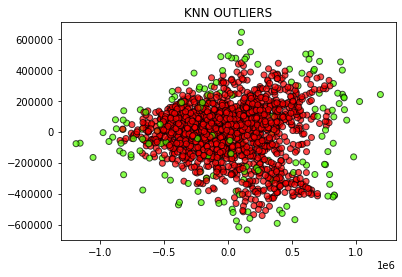

In [107]:
pca = PCA(n_components=2)
pca.fit(X_train_mds)
X_pca = pca.transform(X_train_mds)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_KNN, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("KNN OUTLIERS")

In [108]:
#top 1% outliers
outlier_knn_list = []

for i in range(0,len(outlier_scores_knn)):
    outlier_knn_list.append((outlier_indexes_knn[i], outlier_scores_knn[i]))
    
outlier_knn_list[:10]
outlier_knn_list = sorted(outlier_knn_list, key=outlier_score, reverse = True)
top_outliers_knn = outlier_knn_list[:top1perc]
indexes_list_knn = [i[0] for i in top_outliers_knn] #retrieve index of outliers

df_knn_outliers = df_train.iloc[indexes_list_knn]
df_knn_outliers

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
1818,1,1,0,0,0,-1.590157e-08,-0.000366,0.000000,0.000397,17.369828,...,-0.950053,-0.356922,0,0,1,0,0,0,0,0
1819,1,1,0,1,0,-1.834512e-07,-0.000366,0.000000,0.000488,21.708608,...,-0.757745,-0.512022,0,0,1,0,0,0,0,0
1702,1,0,0,0,1,5.474721e-05,-0.003815,-0.000092,0.003723,20.580156,...,2.036498,-1.440128,0,0,0,1,0,0,0,0
1816,1,1,1,0,0,-1.897455e-07,-0.000122,0.000000,0.000153,23.689075,...,-1.152757,0.346435,0,0,1,0,0,0,0,0
425,1,1,1,1,1,1.323930e-07,-0.000061,0.000000,0.000061,51.805771,...,0.700807,-1.189344,0,1,0,0,0,0,0,0
223,1,0,0,1,1,-1.181012e-06,-0.000183,0.000000,0.000275,14.010083,...,-1.114115,0.025413,0,0,0,0,1,0,0,0
40,1,1,1,0,1,-9.970549e-07,-0.001160,0.000000,0.001007,19.281083,...,-1.072617,0.272193,0,0,0,1,0,0,0,0
1423,0,1,0,1,0,-2.358484e-07,-0.000366,0.000000,0.000427,5.113687,...,-0.418581,-0.801104,0,1,0,0,0,0,0,0
1387,1,1,0,1,0,-5.398735e-08,-0.000977,0.000000,0.000946,15.759554,...,0.339185,-0.924751,1,0,0,0,0,0,0,0
352,1,1,1,0,0,-9.154192e-07,-0.001556,0.000000,0.001709,13.123943,...,-0.977898,0.520642,0,0,0,1,0,0,0,0


In [109]:
#retrieve track id of outliers
outliers_track_id_knn = list(df_knn_outliers.index)
outliers_track_id_knn[:10]
len(outliers_track_id_knn)

18

In [110]:
top_outliers_knn_track_id = []

for i, val in top_outliers_knn:
    top_outliers_knn_track_id.append((df_train.iloc[i].name, val))

print("Track id with knn score of outlierness",len(top_outliers_knn_track_id))
top_outliers_knn_track_id[:10]

Track id with knn score of outlierness 18


[(1818, 438991.33090434026),
 (1819, 430758.9656396501),
 (1702, 367717.38004058925),
 (1816, 366156.478685785),
 (425, 315829.45692994085),
 (223, 278880.32071558817),
 (40, 269252.13884375966),
 (1423, 266984.3108728735),
 (1387, 262618.24115095974),
 (352, 257780.33084412623)]

### Angle - based - approach

In [111]:
clf_ABOD = ABOD()
clf_ABOD.fit(X_train_mds)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [112]:
outliers_ABOD = clf_ABOD.predict(X_train_mds)
np.unique(outliers_ABOD, return_counts=True)

(array([0, 1]), array([1611,  217]))

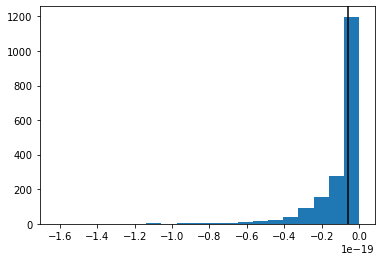

In [113]:
outlier_All_indexes_abod=list(np.where(outliers_ABOD==1)[0])
outlier_indexes_abod = np.where(outliers_ABOD==1)[0]
outlier_scores_abod = clf_ABOD.decision_scores_[outlier_indexes_abod]
y_outliers_ABOD = X_train_mds[outliers_ABOD==1]

plt.hist(clf_ABOD.decision_scores_, bins=20)
plt.axvline(np.min(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'ABOD Outliers')

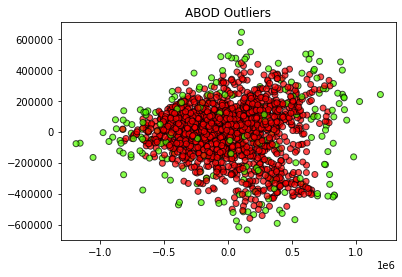

In [114]:
pca = PCA(n_components=2)
pca.fit(X_train_mds)
X_pca = pca.transform(X_train_mds)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_ABOD, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("ABOD Outliers")

In [115]:
outlier_abod_list = []

for i in range(0,len(outlier_scores_abod)):
    outlier_abod_list.append((outlier_indexes_abod[i], outlier_scores_abod[i]))
    
outlier_abod_list = sorted(outlier_abod_list, key=outlier_score, reverse = True)
outlier_abod_list[:10]

[(1816, -3.8119784797813203e-25),
 (1702, -5.7189143239928295e-25),
 (1818, -6.85739936263068e-25),
 (1819, -9.816976449124615e-25),
 (425, -9.86717581040861e-25),
 (927, -3.118006980309584e-24),
 (1421, -4.8234306632510945e-24),
 (382, -7.342155707807744e-24),
 (352, -7.576632495368556e-24),
 (832, -8.809539108120377e-24)]

In [116]:
# top 1% outliers
top_outliers_ABOD = outlier_abod_list[:top1perc]
indexes_list_ABOD = [i[0] for i in top_outliers_ABOD] #retrieve index of outliers
df_ABOD_outliers = df_train.iloc[indexes_list_ABOD]
df_ABOD_outliers

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
1816,1,1,1,0,0,-1.897455e-07,-0.000122,0.000000,0.000153,23.689075,...,-1.152757,0.346435,0,0,1,0,0,0,0,0
1702,1,0,0,0,1,5.474721e-05,-0.003815,-0.000092,0.003723,20.580156,...,2.036498,-1.440128,0,0,0,1,0,0,0,0
1818,1,1,0,0,0,-1.590157e-08,-0.000366,0.000000,0.000397,17.369828,...,-0.950053,-0.356922,0,0,1,0,0,0,0,0
1819,1,1,0,1,0,-1.834512e-07,-0.000366,0.000000,0.000488,21.708608,...,-0.757745,-0.512022,0,0,1,0,0,0,0,0
425,1,1,1,1,1,1.323930e-07,-0.000061,0.000000,0.000061,51.805771,...,0.700807,-1.189344,0,1,0,0,0,0,0,0
927,0,1,0,1,1,-5.549613e-06,-0.000183,0.000000,0.000183,14.133371,...,-1.154368,-0.270769,1,0,0,0,0,0,0,0
1421,0,1,1,1,0,-3.289820e-07,-0.000336,0.000000,0.000366,4.959930,...,-1.261787,0.603681,0,1,0,0,0,0,0,0
382,0,1,0,0,0,-2.465882e-06,-0.002197,0.000000,0.004028,4.549266,...,6.294618,2.725187,0,1,0,0,0,0,0,0
352,1,1,1,0,0,-9.154192e-07,-0.001556,0.000000,0.001709,13.123943,...,-0.977898,0.520642,0,0,0,1,0,0,0,0
832,1,0,1,0,1,2.383745e-07,-0.000427,0.000000,0.000458,12.145021,...,-0.492959,-0.435370,0,0,0,0,0,1,0,0


In [117]:
#retrieve track id of outliers
outliers_track_id_abod = list(df_ABOD_outliers.index)

top_outliers_ABOD_track_id = []

for i, val in top_outliers_ABOD:
    top_outliers_ABOD_track_id.append((df_train.iloc[i].name, val))

print("Track id with ABOD score of outlierness")
top_outliers_ABOD_track_id[:10]


Track id with ABOD score of outlierness


[(1816, -3.8119784797813203e-25),
 (1702, -5.7189143239928295e-25),
 (1818, -6.85739936263068e-25),
 (1819, -9.816976449124615e-25),
 (425, -9.86717581040861e-25),
 (927, -3.118006980309584e-24),
 (1421, -4.8234306632510945e-24),
 (382, -7.342155707807744e-24),
 (352, -7.576632495368556e-24),
 (832, -8.809539108120377e-24)]

ISOLATION FOREST 

In [118]:
from sklearn.ensemble import IsolationForest
clf_if = IsolationForest(random_state=0)
clf_if.fit(X_train_mds)

IsolationForest(random_state=0)

In [119]:
outliers_if = clf_if.predict(X_train_mds)
np.unique(outliers_if, return_counts=True)

(array([-1,  1]), array([ 275, 1553]))

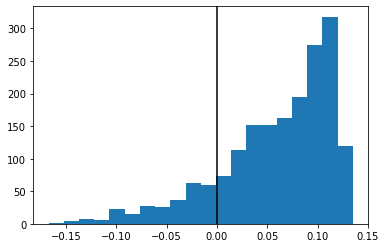

In [121]:
plt.hist(clf_if.decision_function(X_train_mds), bins=20)
plt.axvline(np.min(clf_if.decision_function(X_train_mds)[np.where(outliers_if==1)]), c='k')
plt.show()

Text(0.5, 1.0, 'IF Outliers')

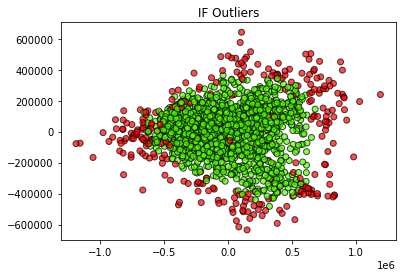

In [122]:
pca = PCA(n_components=2)
pca.fit(X_train_mds)
X_pca = pca.transform(X_train_mds)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_if, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("IF Outliers")

In [124]:
outlier_All_indexes_IF=list(np.where(outliers_if == -1)[0])
y_outliers_if = X_train_mds[outliers_if==1]
outlier_indexes_if = np.where(outliers_if == -1)[0]
indexes_list_if = list(outlier_indexes_if)  #retrieve index of outliers

outlier_scores_if=clf_if.decision_function(X_train_mds)

TOP 10 LOF

In [131]:
from tabulate import tabulate

headers = ["Track_id", "Score"]
print("Latex table\n")
print(tabulate(top_outliers_lof_track_id[:10], headers, colalign=("left","left"), tablefmt = 'latex'))
print()
print('-----------------------------')
print()
print("Normal table\n")
print(tabulate(top_outliers_lof_track_id[:10], headers, colalign=("left","left"), tablefmt = 'simple'))

Latex table

\begin{tabular}{ll}
\hline
 Track\_id   & Score   \\
\hline
 1164       & 99.6544 \\
 936        & 99.6544 \\
 703        & 99.6544 \\
 438        & 99.6544 \\
 498        & 99.6544 \\
 520        & 99.6544 \\
 1091       & 99.6544 \\
 888        & 99.6544 \\
 1051       & 99.6544 \\
 990        & 99.6544 \\
\hline
\end{tabular}

-----------------------------

Normal table

Track_id    Score
----------  -------
1164        99.6544
936         99.6544
703         99.6544
438         99.6544
498         99.6544
520         99.6544
1091        99.6544
888         99.6544
1051        99.6544
990         99.6544


TOP 10 HBOS 

In [133]:
print("Latex table\n")
print(tabulate(indexes_list[:10], headers, colalign=("left","left"), tablefmt = 'latex'))
print()
print('-----------------------------')
print()
print("Normal table\n")
print(tabulate(indexes_list[:10], headers, colalign=("left","left"), tablefmt = 'simple'))

Latex table



TypeError: 'numpy.int64' object is not iterable

TOP 10 KNN

In [134]:
print("Latex table\n")
print(tabulate(top_outliers_knn_track_id[:10], headers, colalign=("left","left"), tablefmt = 'latex'))
print()
print('-----------------------------')
print()
print("Normal table\n")
print(tabulate(top_outliers_knn_track_id[:10], headers, colalign=("left","left"), tablefmt = 'simple'))

Latex table

\begin{tabular}{ll}
\hline
 Track\_id   & Score   \\
\hline
 1818       & 438991  \\
 1819       & 430759  \\
 1702       & 367717  \\
 1816       & 366156  \\
 425        & 315829  \\
 223        & 278880  \\
 40         & 269252  \\
 1423       & 266984  \\
 1387       & 262618  \\
 352        & 257780  \\
\hline
\end{tabular}

-----------------------------

Normal table

Track_id    Score
----------  -------
1818        438991
1819        430759
1702        367717
1816        366156
425         315829
223         278880
40          269252
1423        266984
1387        262618
352         257780


TOP 10 ABOD

In [135]:
print("Latex table\n")
print(tabulate(top_outliers_ABOD_track_id[:10], headers, colalign=("left","left"), tablefmt = 'latex'))
print()
print('-----------------------------')
print()
print("Normal table\n")
print(tabulate(top_outliers_ABOD_track_id[:10], headers, colalign=("left","left"), tablefmt = 'simple'))

Latex table

\begin{tabular}{ll}
\hline
 Track\_id   & Score        \\
\hline
 1816       & -3.81198e-25 \\
 1702       & -5.71891e-25 \\
 1818       & -6.8574e-25  \\
 1819       & -9.81698e-25 \\
 425        & -9.86718e-25 \\
 927        & -3.11801e-24 \\
 1421       & -4.82343e-24 \\
 382        & -7.34216e-24 \\
 352        & -7.57663e-24 \\
 832        & -8.80954e-24 \\
\hline
\end{tabular}

-----------------------------

Normal table

Track_id    Score
----------  ------------
1816        -3.81198e-25
1702        -5.71891e-25
1818        -6.8574e-25
1819        -9.81698e-25
425         -9.86718e-25
927         -3.11801e-24
1421        -4.82343e-24
382         -7.34216e-24
352         -7.57663e-24
832         -8.80954e-24
